In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_moons
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_blobs, make_classification



# Generate synthetic "moons" data
np.random.seed(42)

# Function to determine and plot number of clusters
def plot_clustering(X, linkage_method, num_clusters=None, threshold=None):
    # Perform hierarchical clustering
    Z = linkage(X, method=linkage_method)
    
    # Determine clusters using number of clusters or threshold
    if num_clusters is not None:
        labels = fcluster(Z, t=num_clusters, criterion='maxclust')
    elif threshold is not None:
        labels = fcluster(Z, t=threshold, criterion='distance')
    else:
        raise ValueError("Either num_clusters or threshold must be provided.")

    # Calculate the number of clusters
    unique_clusters = len(set(labels))
    print(f'Number of clusters: {unique_clusters}')
    
    # Plot original data
    plt.figure(figsize=(18, 6))
    
    # Original Data
    plt.subplot(1, 3, 1)
    plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k', s=50)
    plt.title('Original Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    # Clustered Data
    plt.subplot(1, 3, 2)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(f'{linkage_method.capitalize()} Linkage Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    # Dendrogram
    plt.subplot(1, 3, 3)
    dendrogram(Z)
    plt.title(f'{linkage_method.capitalize()} Linkage Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

    plt.tight_layout()
    plt.show()



# Function to generate synthetic data
def generate_data(data_type, n_samples=500, noise=0.1):
    if data_type == 'moons':
        return make_moons(n_samples=n_samples, noise=noise, random_state=42)
    elif data_type == 'circles':
        return make_circles(n_samples=n_samples, noise=0.05, factor=0.5, random_state=42)
    elif data_type == 'blobs':
        return make_blobs(n_samples=n_samples, centers=3, cluster_std=0.5, random_state=42)
    elif data_type == 'classification':
        return make_classification(n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
    else:
        raise ValueError("Unsupported data type. Choose from 'moons', 'circles', 'blobs', 'classification'.")





Data type: moons, Linkage method: single
Number of clusters: 2


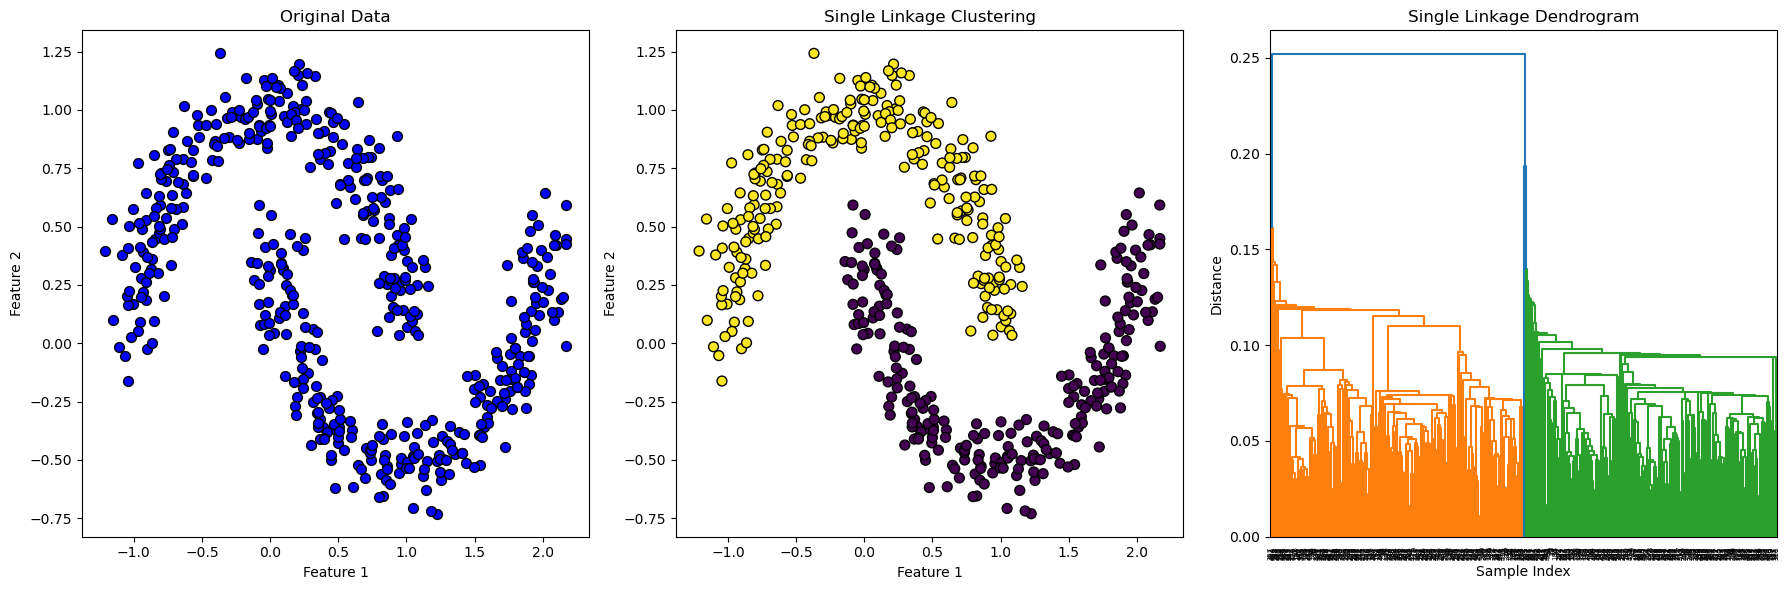

Data type: moons, Linkage method: complete
Number of clusters: 2


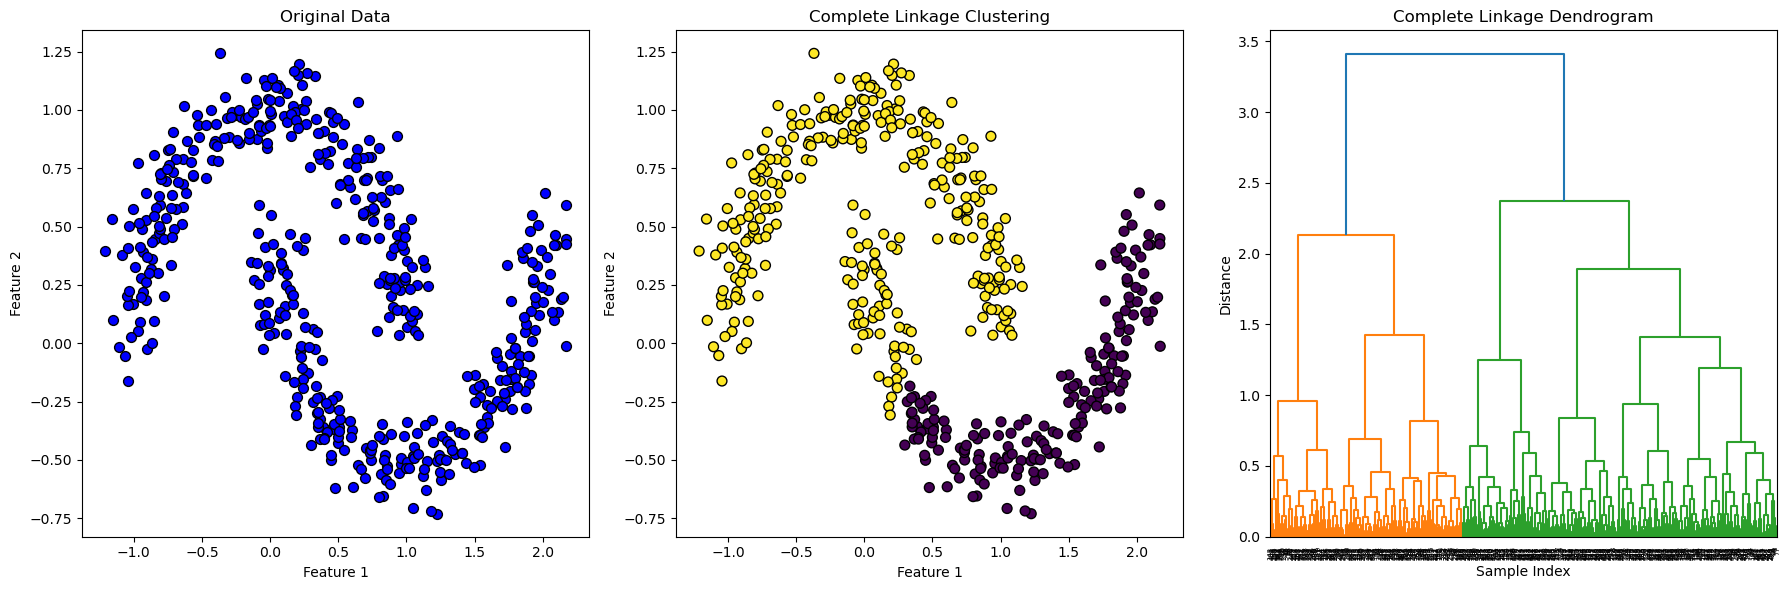

Data type: moons, Linkage method: average
Number of clusters: 2


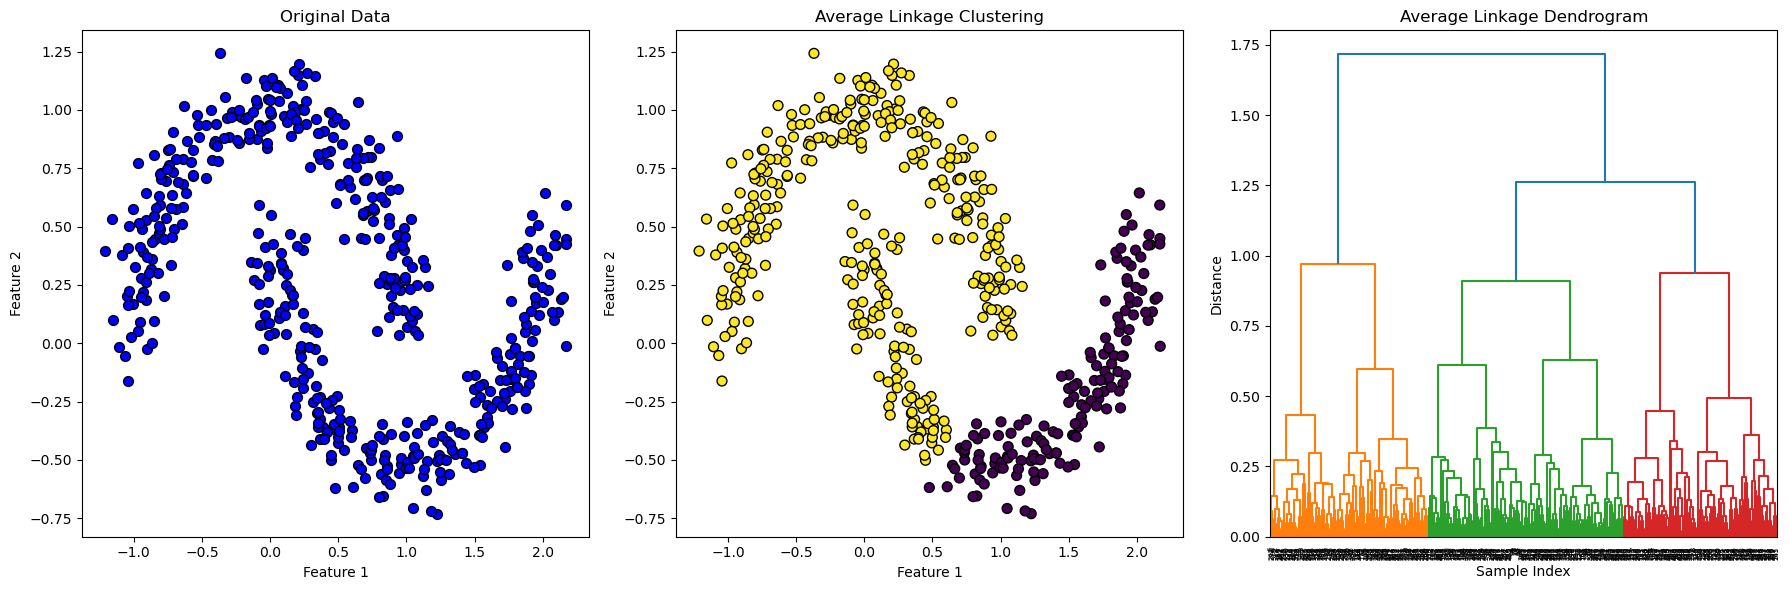

Data type: moons, Linkage method: ward
Number of clusters: 2


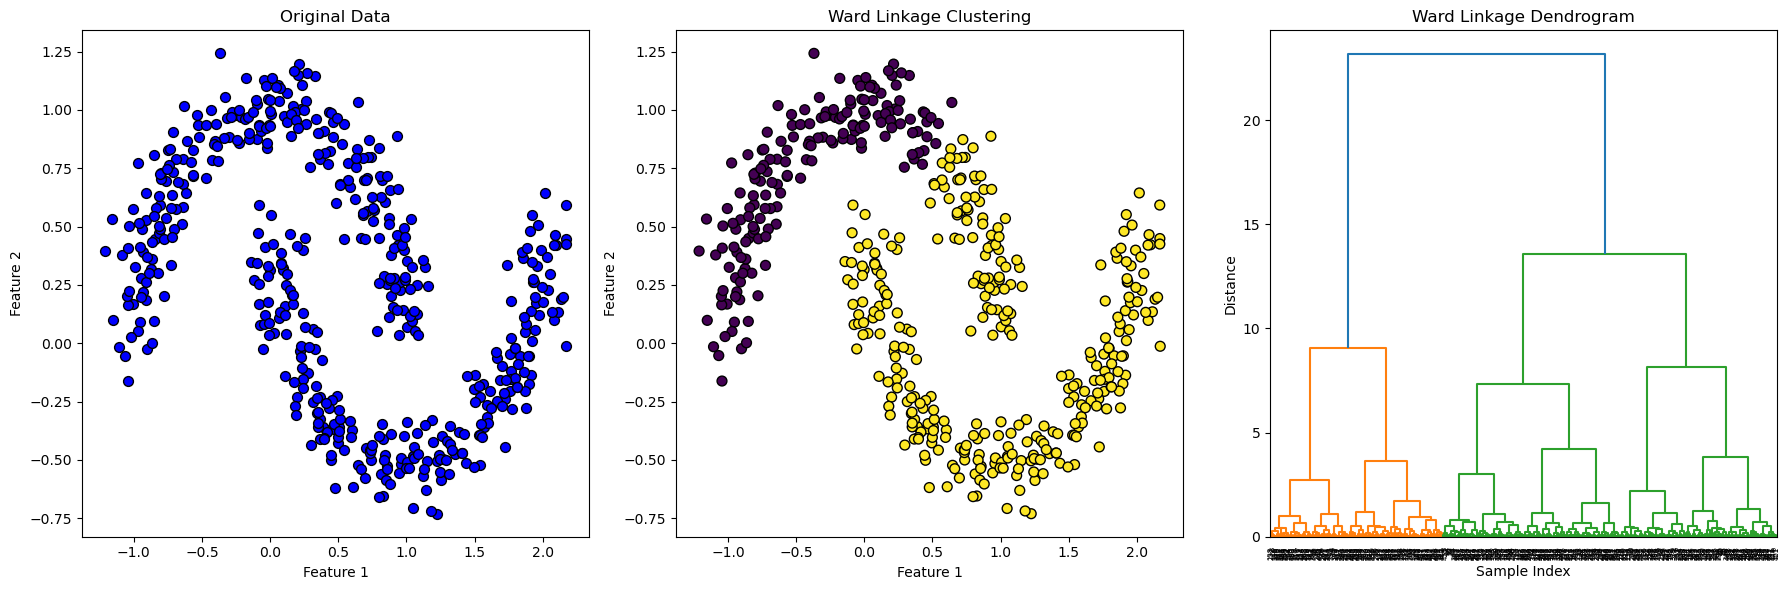

In [11]:
# Example usage with different linkage methods and number of clusters
data_type = 'moons'
linkage_methods = ['single', 'complete', 'average', 'ward']
num_clusters = 2  # Specify the desired number of clusters

X, _ = generate_data(data_type)
for linkage_method in linkage_methods:
    print(f'Data type: {data_type}, Linkage method: {linkage_method}')
    plot_clustering(X, linkage_method, num_clusters=num_clusters)

Data type: blobs, Linkage method: single
Number of clusters: 3


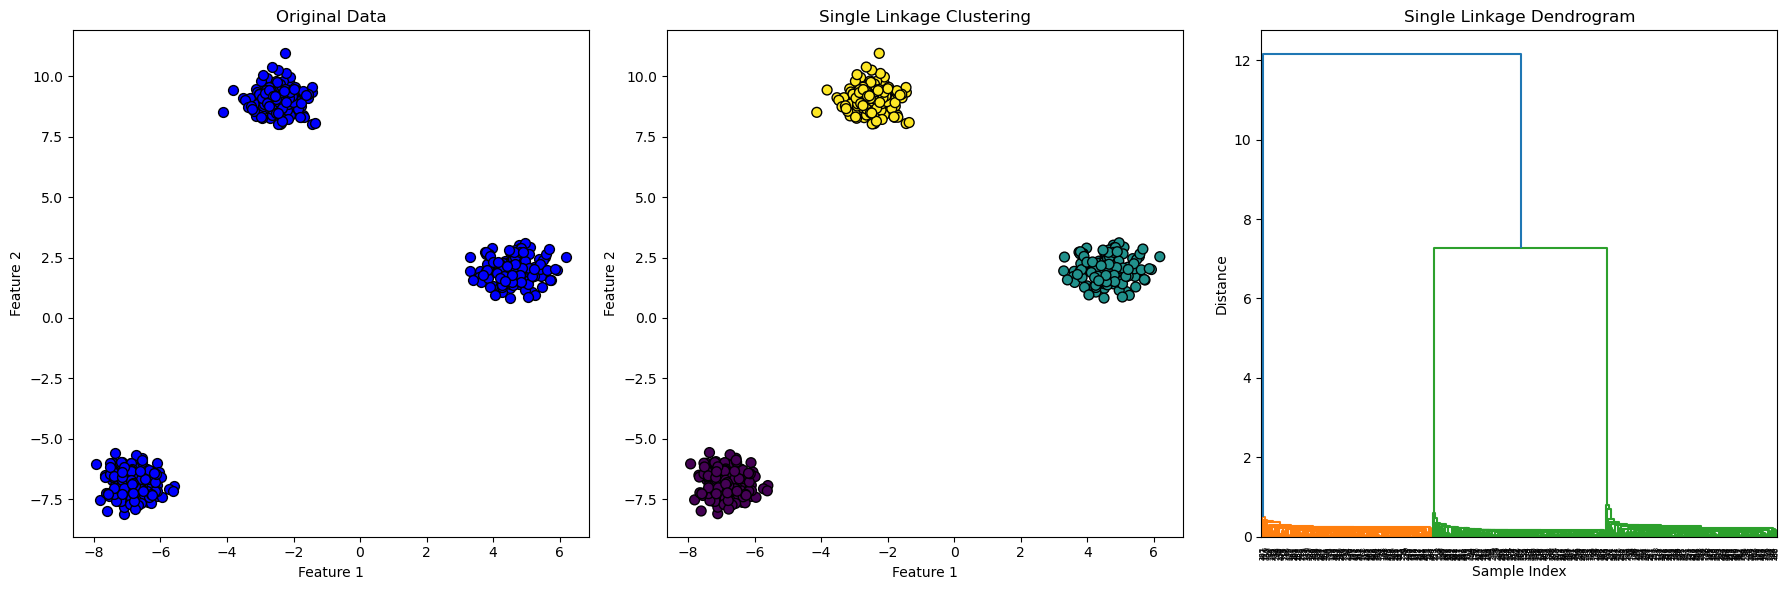

Data type: blobs, Linkage method: complete
Number of clusters: 3


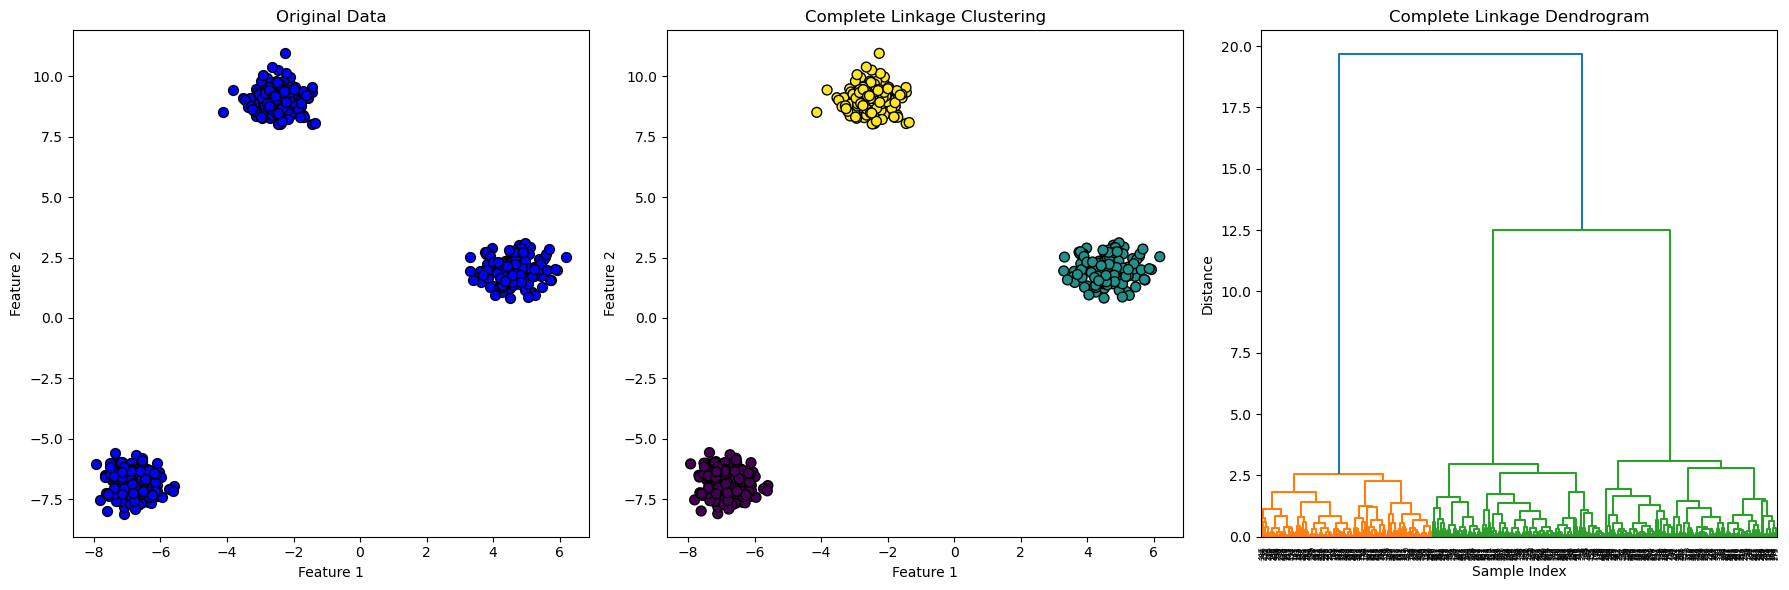

Data type: blobs, Linkage method: average
Number of clusters: 3


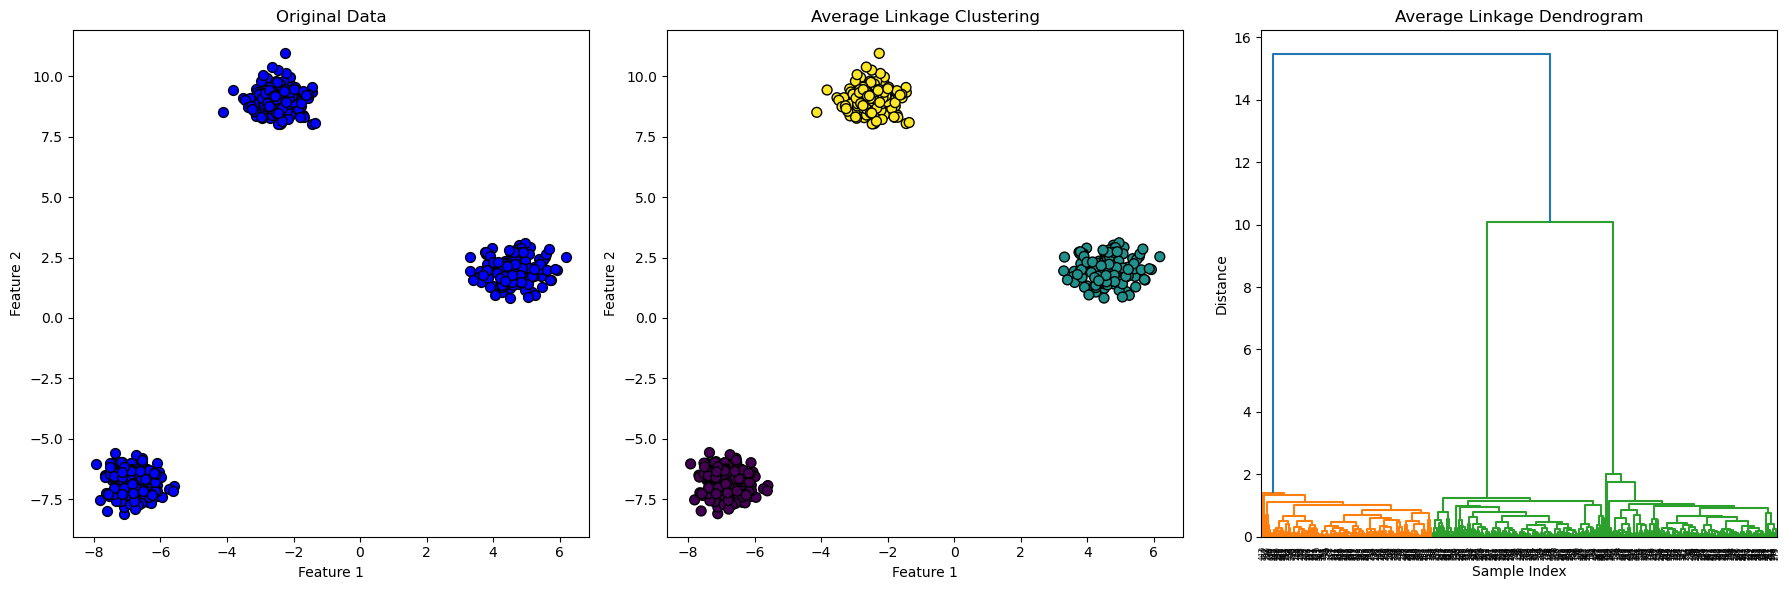

Data type: blobs, Linkage method: ward
Number of clusters: 3


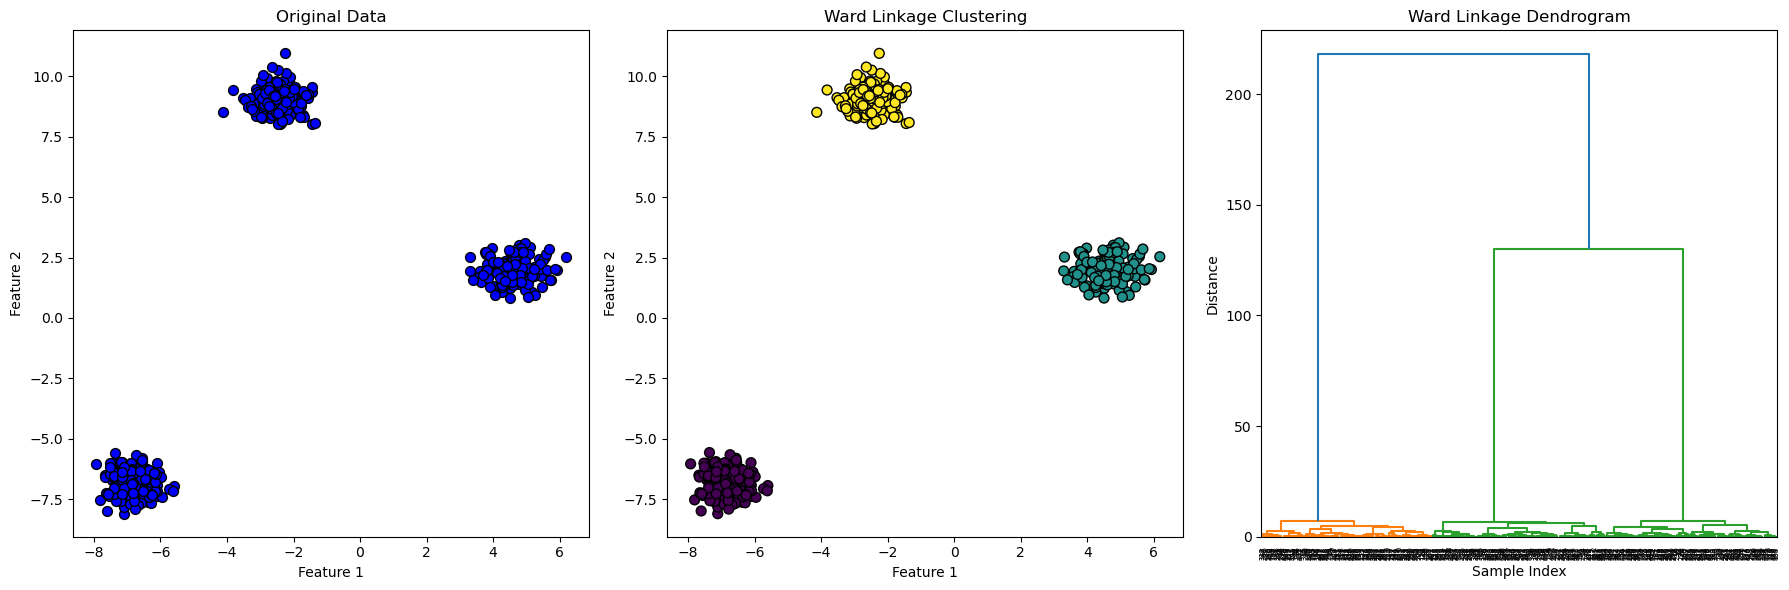

In [12]:
# Example usage with different linkage methods and number of clusters
data_type = 'blobs'
linkage_methods = ['single', 'complete', 'average', 'ward']
num_clusters = 3  # Specify the desired number of clusters

X, _ = generate_data(data_type)
for linkage_method in linkage_methods:
    print(f'Data type: {data_type}, Linkage method: {linkage_method}')
    plot_clustering(X, linkage_method, num_clusters=num_clusters)

Data type: circles, Linkage method: single
Number of clusters: 2


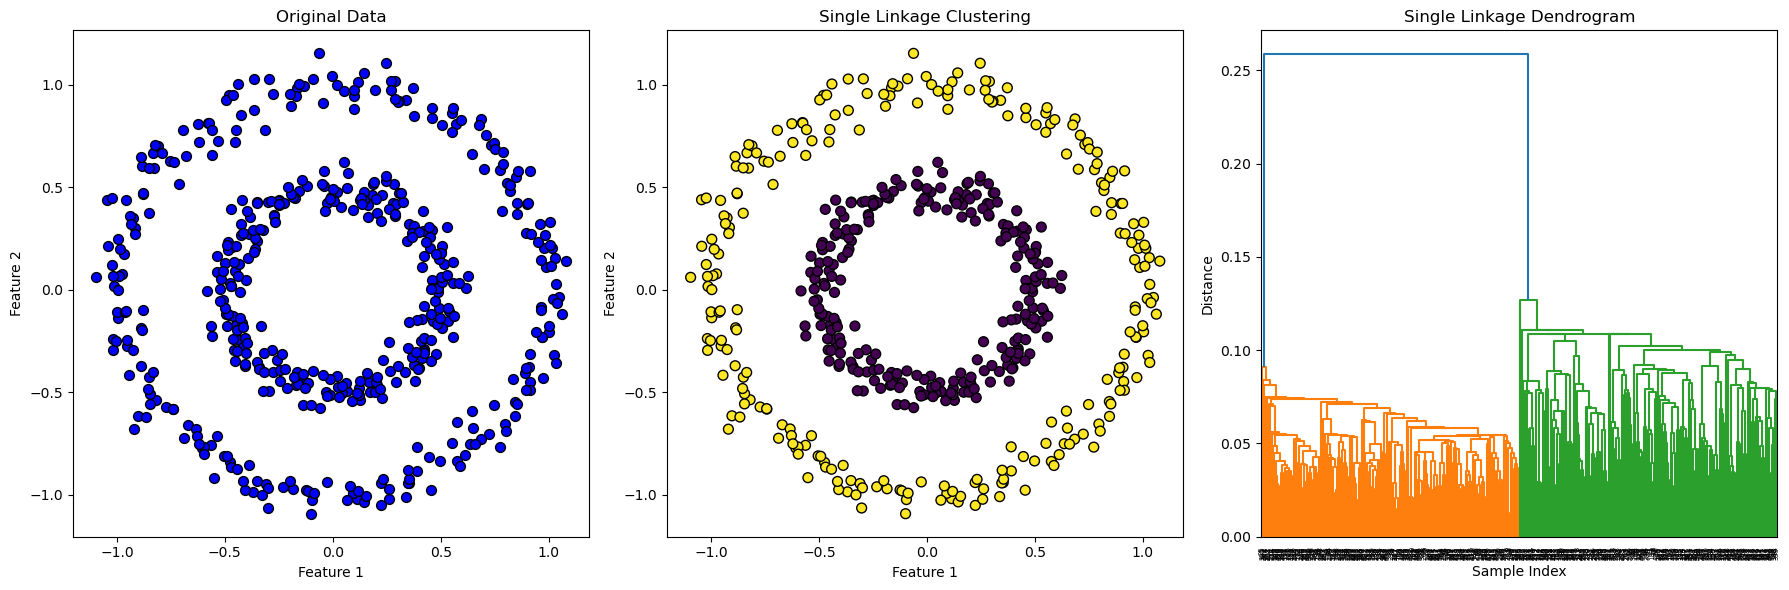

Data type: circles, Linkage method: complete
Number of clusters: 2


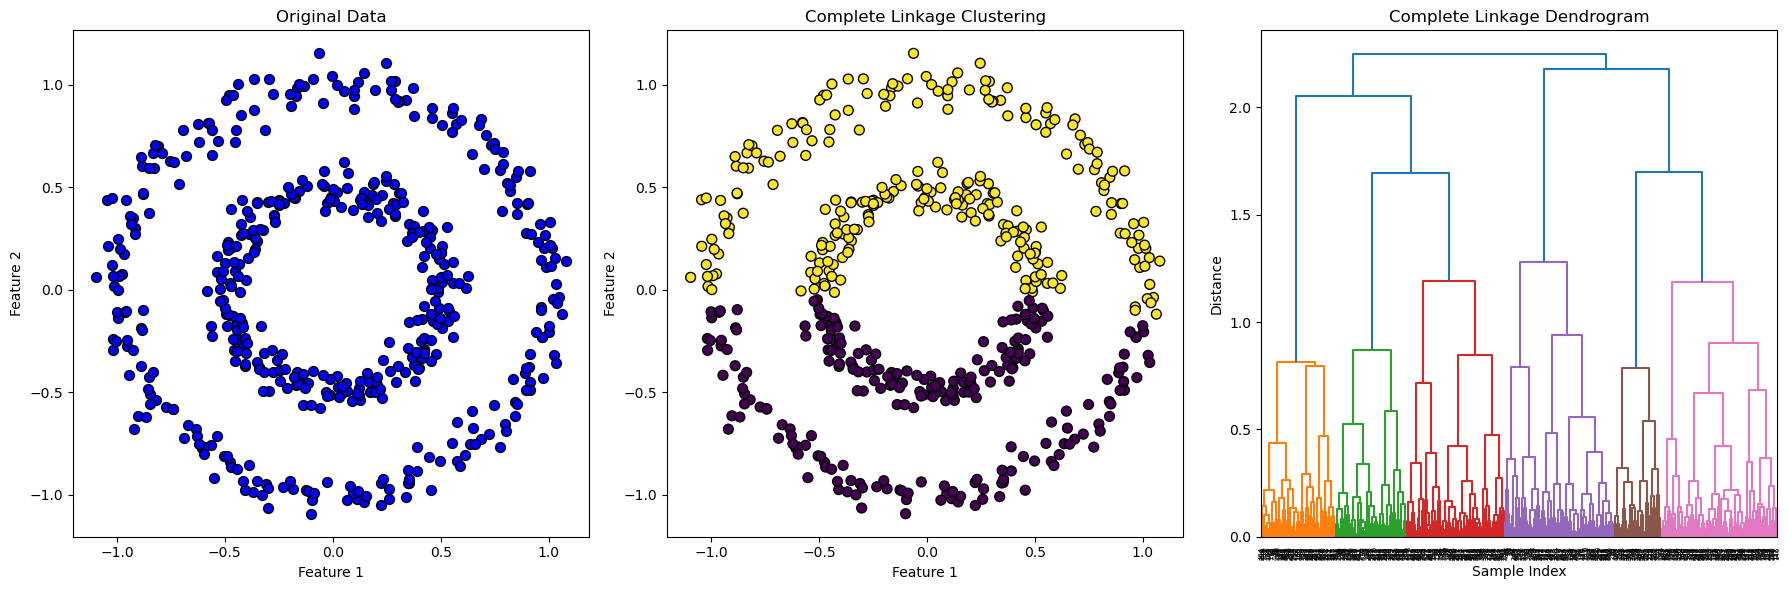

Data type: circles, Linkage method: average
Number of clusters: 2


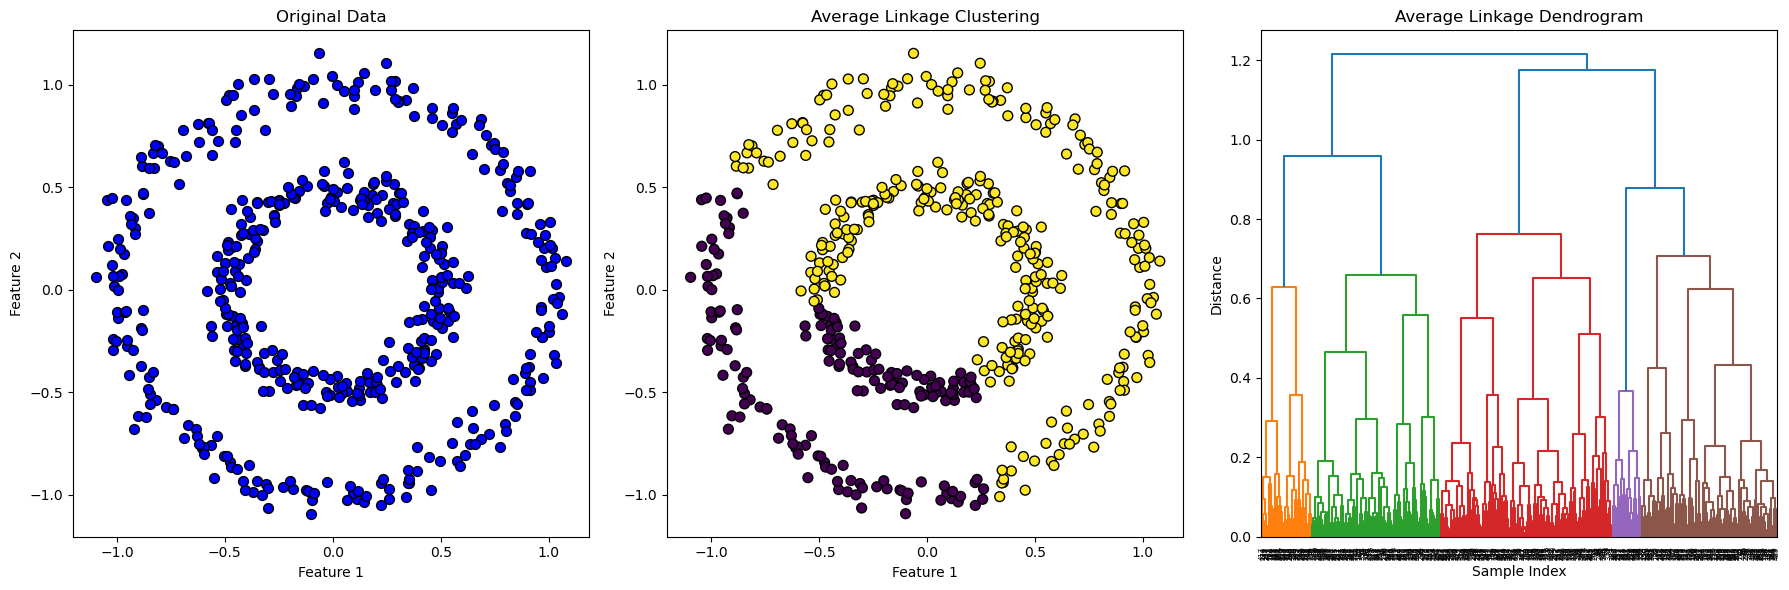

Data type: circles, Linkage method: ward
Number of clusters: 2


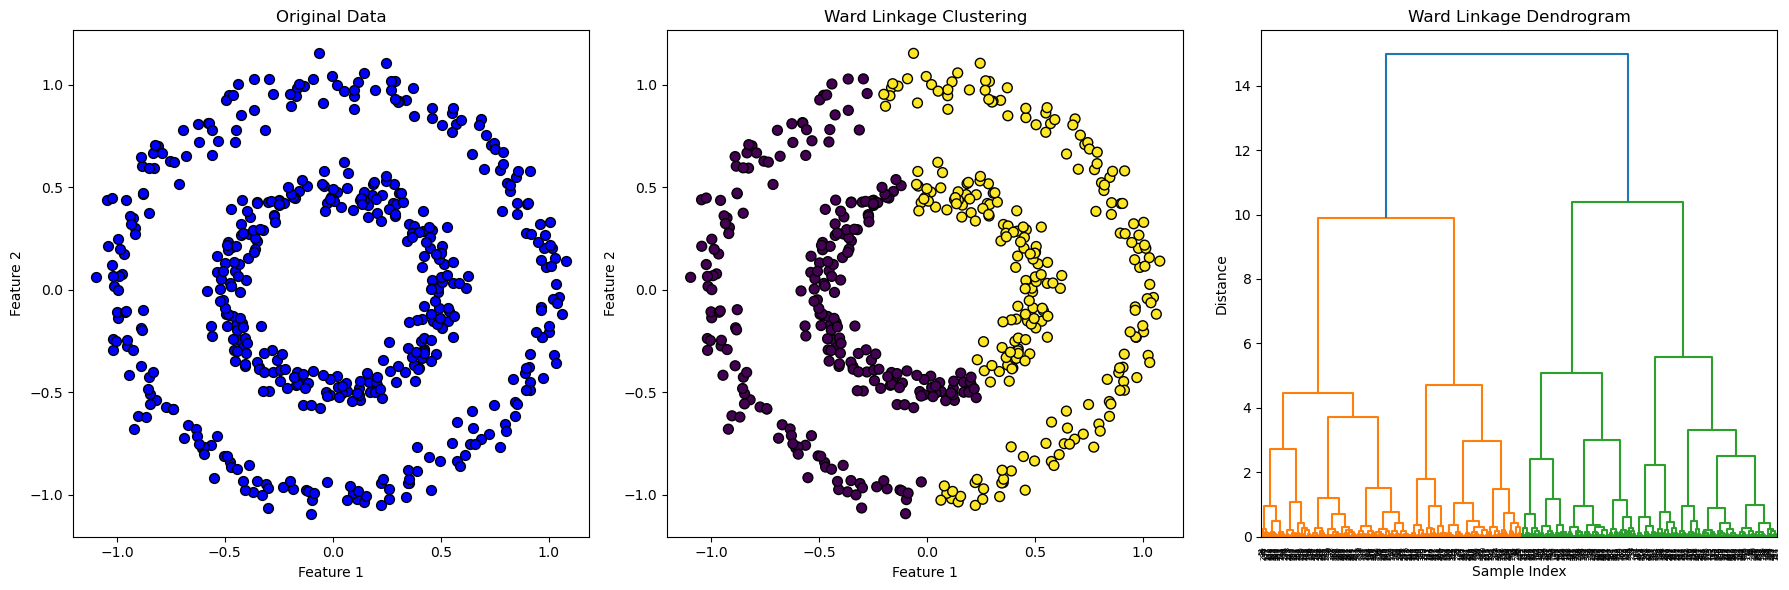

In [13]:
# Example usage with different linkage methods and number of clusters
data_type = 'circles'
linkage_methods = ['single', 'complete', 'average', 'ward']
num_clusters = 2  # Specify the desired number of clusters

X, _ = generate_data(data_type)
for linkage_method in linkage_methods:
    print(f'Data type: {data_type}, Linkage method: {linkage_method}')
    plot_clustering(X, linkage_method, num_clusters=num_clusters)

**Complete linkage** assumes clusters are spherical and evenly shaped. 
- Circular data often has non-spherical clusters (rings or circular shapes), which do not fit this assumption well.
- As a result, the algorithm may not merge clusters correctly.


Like complete linkage, **average linkage assumes** that clusters are spherical or evenly shaped.
- Circular clusters do not fit this assumption well, leading to potential inaccuracies in merging decisions.



**Ward’s linkage** aims to minimize the increase in variance when merging clusters. 
- This approach works well for compact, spherical clusters but not for elongated or circular clusters.